### Clase 07 - Curvas

## 1. Introducción

En el mercado de renta fija, los bonos de descuento se concentran en el tramo más corto de la curva de rendimiento, mientras que para vencimientos de mediano y largo plazo los bonos emiten cupones. Esta característica introduce una complejidad adicional, ya que es necesario distinguir entre la **tasa pura de descuento** (o tasa spot) y la **TIR** (Tasa Interna de Retorno) de un bono cupón, que representa el rendimiento total si se mantienen los flujos de caja hasta la madurez.

El objetivo de esta clase es:

- **Derivar la curva zero‑coupon** mediante el método de *bootstrapping* a partir de los precios de bonos.
- **Analizar la curva resultante** y compararla con la curva de rendimientos ytm.
- **Calcular la curva forward** a 1 año a partir de la curva zero‑coupon.



## 2. Supuestos Teóricos

Para aplicar correctamente estos métodos se asume lo siguiente:

- **No-arbitraje:** Los precios observados reflejan una ausencia de oportunidades de arbitraje.
- **Mercado eficiente:** Los flujos de caja de los bonos son conocidos con certeza y se descontarán de manera uniforme.
- **Flujos determinados:** Los pagos de cupones y el reembolso del principal se realizan conforme a lo estipulado en los contratos.
- **Consistencia en el compounding:** Se asume un sistema homogéneo de capitalización (por ejemplo, anual) para el descuento de todos los flujos.

Estos supuestos son esenciales para separar correctamente la tasa “pura” de descuento (spot) de la TIR de los bonos con cupones.

## 3. Fórmulas

#### Precio de un Bono de Descuento (Zero‑Coupon)
Para bonos sin cupones, el precio se relaciona con la tasa spot mediante:
  
$$
P = \frac{F}{(1+z(t))^{t}}
$$

donde:
- $P$ es el precio del bono,
- $F$ es el valor nominal,
- $z(t)$ es la tasa spot para el vencimiento $t$, y
- $t$ es el tiempo en años.

#### Precio de un Bono con Cupones
Para bonos que distribuyen cupones, el precio se expresa como la suma de los flujos descontados:

$$
P = (\sum_{i=1}^{n-1} \frac{C}{(1+z_i)^i} )+ \frac{C+F}{(1+z_n)^n}
$$

donde:
- $C$ es el cupón periódico,
- $F$ es el valor nominal,
- $z_i$ son las tasas spot ya determinadas para los periodos anteriores, y
- $n$ es el número total de periodos.

#### Cálculo de la Tasa Spot para un Bono con Cupones

El proceso de **bootstrapping** consiste en despejar la tasa spot \( z_n \) para el último vencimiento, partiendo del precio observado del bono. Para ello, se sigue este razonamiento:

1. **Descontar Flujos Conocidos:**  
   Se descuentan todos los pagos de cupones de los periodos 1 a \( n-1 \) usando las tasas spot ya calculadas. La suma de estos valores descontados es:
   
   $$
   \sum_{i=1}^{n-1}\frac{C}{(1+z_i)^i}
   $$

2. **Determinar el Flujo Restante:**  
   Al restar el valor de los cupones descontados del precio total \( P \), se obtiene el valor presente asignado al flujo final (pago del cupón más el principal):

   $$
   P - \sum_{i=1}^{n-1}\frac{C}{(1+z_i)^i} = \frac{C+F}{(1+z_n)^n}
   $$

3. **Despejar \( z_n \):**  
   Para hallar la tasa spot \( z_n \) correspondiente al período \( n \), se despeja \( z_n \) de la ecuación anterior. Primero, se despeja el factor de descuento:

   $$
   (1+z_n)^n = \frac{C+F}{P - \sum_{i=1}^{n-1}\frac{C}{(1+z_i)^i}}
   $$

   Finalmente, se toma la raíz \( n \)-ésima y se resta 1:

   $$
   z_n = \left(\frac{C + F}{P - \sum_{i=1}^{n-1}\frac{C}{(1+z_i)^i}}\right)^{\frac{1}{n}} - 1
   $$


In [1]:
import pandas as pd
import numpy as np

# Intento cargar datos desde ruta local, sino desde URL
try:
    ruta = "data/yield_curve_historical_usa.xlsx"
    df = pd.read_excel(ruta, parse_dates=['date'], index_col='date')
except:
    url = "https://github.com/ECFIN-USACH/economia-financiera/raw/main/data/yield_curve_historical_usa.xlsx"
    df = pd.read_excel(url, parse_dates=['date'], index_col='date') 

# Seleccionar únicamente las columnas relevantes y obtener los últimos 500 registros
df = df[['1 Año', '2 Años', '3 Años', '5 Años', '7 Años', '10 Años', '20 Años', '30 Años']]
df = df.tail(500)
df.head()


,1 Año,2 Años,3 Años,5 Años,7 Años,10 Años,20 Años,30 Años
date,,,,,,,,
2023-04-07,4.61,3.97,3.72,3.49,3.45,3.39,3.73,3.61
2023-04-10,4.65,4.00,3.75,3.52,3.47,3.41,3.74,3.62
2023-04-11,4.67,4.03,3.76,3.54,3.48,3.43,3.75,3.62
2023-04-12,4.64,3.95,3.68,3.46,3.43,3.41,3.75,3.64
2023-04-13,4.66,3.96,3.70,3.51,3.48,3.45,3.80,3.69


Tasas Spot (bootstrapping):
   Maturity  Spot Rate
0         1   3.860000
1         2   3.727579
2         3   3.718014
3         5   3.823614
4         7   3.983166
5        10   4.176654
6        20   4.686829
7        30   4.650975

Tabla de desarrollo:
   Maturity  YTM (%)  Coupon  Discounted_Coupons        DF  Spot Rate (%)
0       1.0     3.86    3.86            0.000000  0.962835       3.860000
1       2.0     3.73    3.73            3.591373  0.929419       3.727579
2       3.0     3.72    3.72            7.039183  0.896267       3.718014
3       5.0     3.82    3.82           13.940205  0.828933       3.823614
4       7.0     3.97    3.97           20.901765  0.760779       3.983166
5      10.0     4.15    4.15           30.824035  0.664196       4.176654
6      20.0     4.61    4.61           58.146447  0.400091       4.686829
7      30.0     4.58    4.58           73.260684  0.255683       4.650975


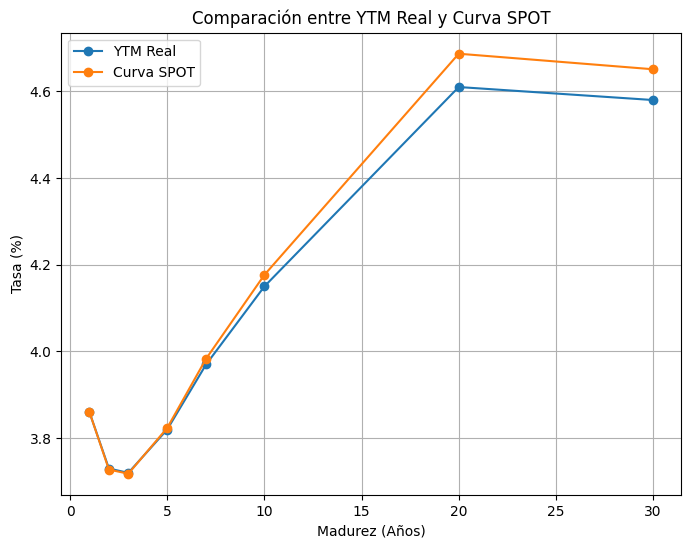

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_zero_rates(ytm_series, periodicity=1):
    """
    Calcula las tasas zero-cupón (spot) a partir de una serie de YTM para bonos a la par.
    
    Parámetros:
      ytm_series : pd.Series
          Serie de rendimientos donde el índice representa la madurez 
          (por ejemplo: "1 Año", "2 Años", ...) y el valor es el YTM en porcentaje.
      periodicity : int, opcional
          Frecuencia de pagos de cupón por año (por defecto 1).
    
    Retorna:
      pd.DataFrame con columnas:
         - 'Maturity': madurez en años.
         - 'Spot Rate': tasa zero en porcentaje.
    """
    spot_rates = {}  # Guardará las tasas spot con clave = madurez entera
    # Ordenamos las madureces de forma creciente.
    maturities = sorted(ytm_series.index, key=lambda x: float(x.split()[0]) if isinstance(x, str) else x)
    
    for mat in maturities:
        # Convertir el índice a número (por ejemplo: "2 Años" -> 2.0)
        if isinstance(mat, str):
            years = float(mat.split()[0])
        else:
            years = float(mat)
        r = ytm_series[mat] / 100.0  
        coupon = 100 * r  # Se asume cupón igual al YTM (sobre 100)
        
        if years == 1:
            # Para el bono a 1 año, la tasa spot es simplemente el YTM.
            spot = r
        else:
            sum_discounted = 0.0
            # Se descuentan los cupones de los períodos anteriores. Se asume pago anual.
            for t in range(1, int(years)):
                # Si ya se calculó la tasa spot para el período t, se usa;
                # de lo contrario se utiliza el rendimiento actual (r) para descontar.
                if t in spot_rates:
                    discount_factor = (1 + spot_rates[t])**t
                else:
                    discount_factor = (1 + r)**t
                sum_discounted += coupon / discount_factor
            # La ecuación del bono a la par es:
            # 100 = (sum de cupones descontados) + (coupon + 100)/(1+s)**years
            DF = (100 - sum_discounted) / (coupon + 100)
            spot = (1/DF)**(1/years) - 1
        # Se guarda la tasa spot para la madurez actual (clave entera)
        spot_rates[int(years)] = spot
    
    # Convertir el diccionario a DataFrame y ajustar a porcentaje.
    df_spots = pd.DataFrame({
        'Maturity': list(spot_rates.keys()),
        'Spot Rate': [spot_rates[m] * 100 for m in spot_rates]
    })
    return df_spots

def development_table(ytm_series, periodicity=1):
    """
    Calcula la tabla de desarrollo para cada bono, mostrando:
      - Madurez (años)
      - YTM (en %)
      - Cupón
      - Suma de flujos descontados de los cupones anteriores
      - Factor de descuento (DF) para el último flujo
      - Tasa Spot (zero rate) en %
      
    Se asume que cada bono a la par tiene precio 100 y su cupón es igual al YTM.
    
    Parámetros:
      ytm_series : pd.Series
          Serie con rendimientos en porcentaje, con índice representando la madurez.
      periodicity : int, opcional
          Frecuencia de pagos de cupón por año (por defecto 1).
    
    Retorna:
      pd.DataFrame con la tabla de desarrollo.
    """
    table = []
    spot_rates_dict = {}  # Para guardar las tasas spot en cada paso (en decimal)
    maturities = sorted(ytm_series.index, key=lambda x: float(x.split()[0]) if isinstance(x, str) else x)
    
    for mat in maturities:
        if isinstance(mat, str):
            years = float(mat.split()[0])
        else:
            years = float(mat)
        r = ytm_series[mat] / 100.0
        coupon = 100 * r
        
        if years == 1:
            discounted_sum = 0.0
            DF = (100 - discounted_sum) / (coupon + 100)
            spot = (1/DF)**(1/years) - 1
        else:
            discounted_sum = 0.0
            # Descontar usando las tasas spot disponibles; en ausencia de ellas se utiliza r.
            for t in range(1, int(years)):
                if t in spot_rates_dict:
                    discount_factor = (1 + spot_rates_dict[t])**t
                else:
                    discount_factor = (1 + r)**t
                discounted_sum += coupon / discount_factor
            DF = (100 - discounted_sum) / (coupon + 100)
            spot = (1/DF)**(1/years) - 1
        
        spot_rates_dict[int(years)] = spot
        
        table.append({
            "Maturity": years,
            "YTM (%)": r * 100,
            "Coupon": coupon,
            "Discounted_Coupons": discounted_sum,
            "DF": DF,
            "Spot Rate (%)": spot * 100
        })
        
    return pd.DataFrame(table)

def plot_yield_vs_spot(ytm_series, dev_table):
    """
    Grafica la comparación entre la curva de YTM "real" y la curva de tasas Spot
    derivada mediante bootstrapping (tabla de desarrollo).
    
    Parámetros:
      ytm_series : pd.Series
          Serie original de YTM en porcentaje (la usamos para la curva real).
      dev_table : pd.DataFrame
          Tabla de desarrollo que incluye columnas 'Maturity', 'YTM (%)' y 'Spot Rate (%)'.
    """
    maturities = dev_table["Maturity"]
    ytm_values = dev_table["YTM (%)"]
    spot_values = dev_table["Spot Rate (%)"]
    
    plt.figure(figsize=(8, 6))
    plt.plot(maturities, ytm_values, marker='o', label="YTM Real")
    plt.plot(maturities, spot_values, marker='o', label="Curva SPOT")
    plt.xlabel("Madurez (Años)")
    plt.ylabel("Tasa (%)")
    plt.title("Comparación entre YTM Real y Curva SPOT")
    plt.legend()
    plt.grid(True)
    plt.show()




Tasas Spot (bootstrapping):
   Maturity  Spot Rate
0         1   3.860000
1         2   3.727579
2         3   3.718014
3         5   3.823614
4         7   3.983166
5        10   4.176654
6        20   4.686829
7        30   4.650975

Tabla de desarrollo:
   Maturity  YTM (%)  Coupon  Discounted_Coupons        DF  Spot Rate (%)
0       1.0     3.86    3.86            0.000000  0.962835       3.860000
1       2.0     3.73    3.73            3.591373  0.929419       3.727579
2       3.0     3.72    3.72            7.039183  0.896267       3.718014
3       5.0     3.82    3.82           13.940205  0.828933       3.823614
4       7.0     3.97    3.97           20.901765  0.760779       3.983166
5      10.0     4.15    4.15           30.824035  0.664196       4.176654
6      20.0     4.61    4.61           58.146447  0.400091       4.686829
7      30.0     4.58    4.58           73.260684  0.255683       4.650975


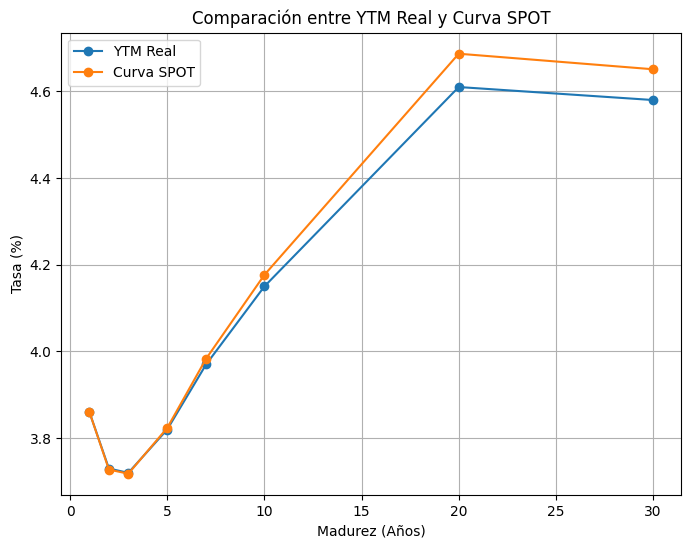

In [ ]:

latest_date = df.index[-1]
ytm_series = df.loc[latest_date]

# Calcular las tasas spot mediante bootstrapping
spots_df = bootstrap_zero_rates(ytm_series, periodicity=1)
print("Tasas Spot (bootstrapping):")
print(spots_df)

# Generar la tabla de desarrollo completa
dev_table = development_table(ytm_series, periodicity=1)
print("\nTabla de desarrollo:")
print(dev_table)

# Graficar la comparación entre YTM real y la curva Spot
plot_yield_vs_spot(ytm_series, dev_table)

In [30]:
spots_df

,Maturity,Spot Rate
0,1,3.860000
1,2,3.727579
2,3,3.718014
3,5,3.823614
4,7,3.983166
5,10,4.176654
6,20,4.686829
7,30,4.650975


Curva forward a partir de T=3 años:
De T=3 a T=4 (1 año(s)): 3.50%
De T=3 a T=5 (2 año(s)): 3.75%
De T=3 a T=6 (3 año(s)): 3.70%
De T=3 a T=7 (4 año(s)): 3.73%
De T=3 a T=8 (5 año(s)): 3.78%
De T=3 a T=9 (6 año(s)): 3.85%
De T=3 a T=10 (7 año(s)): 3.93%


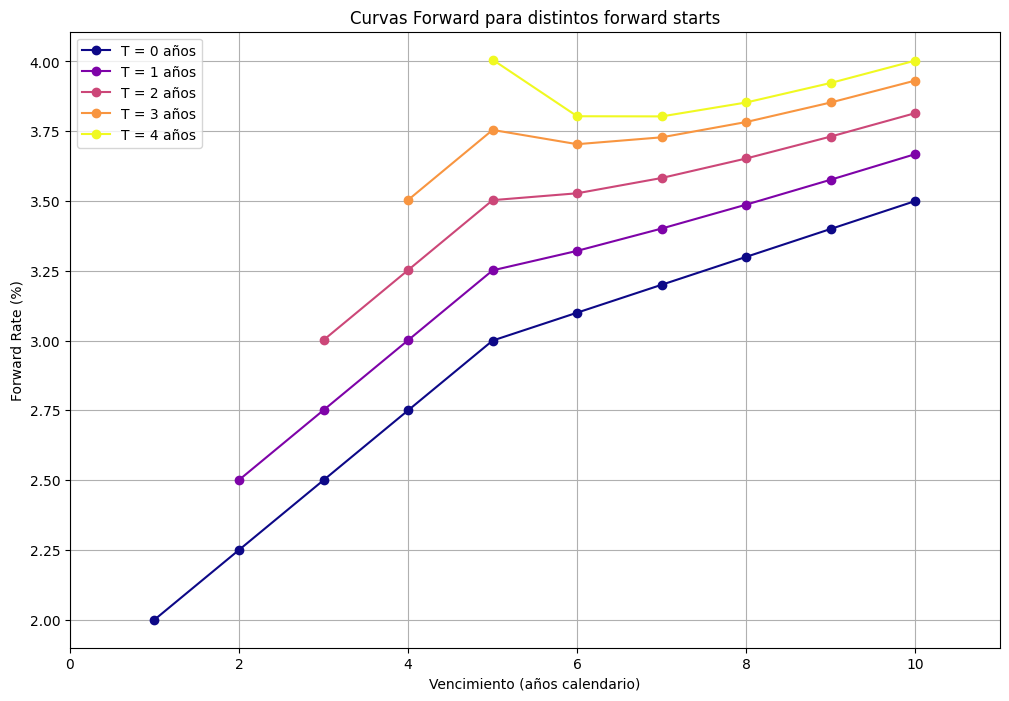

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def interpolate_spot_curve_to_horizon(spot_df, horizon=10):
    """
    Interpola la curva spot linealmente para obtener la tasa spot para cada año hasta el horizonte.
    Se agrega la condición s(0)=0.
    
    Parámetros:
      - spot_df: DataFrame con columnas "Maturity" y "Spot Rate" (en porcentaje).
      - horizon: horizonte de tiempo (en años) hasta donde interpolar.
      
    Retorna un diccionario {0: 0.0, 1: s(1), …, horizon: s(horizon)}
    con las tasas en decimal.
    """
    maturities = np.arange(1, horizon+1)
    x_known = np.array(spot_df["Maturity"])
    y_known = np.array(spot_df["Spot Rate"]) / 100.0  # Convertir a decimal
    y_interp = np.interp(maturities, x_known, y_known)
    
    spot_curve = {0: 0.0}
    for t, rate in zip(maturities, y_interp):
        spot_curve[t] = rate
    return spot_curve

def compute_forward_rate(spot_curve, T, h):
    """
    Calcula la tasa forward f(T, T+h) usando:
       f(T, T+h) = [ (1+s(T+h))^(T+h) / (1+s(T))^T ]^(1/h) - 1
    donde:
       - spot_curve: diccionario con s(0), s(1), ...
       - T: forward start (años)
       - h: duración del forward (de T a T+h)
    """
    numerator = (1 + spot_curve[T+h])**(T+h)
    denominator = (1 + spot_curve[T])**(T)
    return (numerator / denominator)**(1/h) - 1

def forward_curve_from_T(spot_curve, T, horizon):
    """
    Calcula la curva forward (o spot implícita) a partir del tiempo T.
    
    Para cada vencimiento m (de T+1 hasta horizonte), se calcula:
       f(T, m-T) = [ (1+s(m))^m / (1+s(T))^T ]^(1/(m-T)) - 1
       
    Devuelve:
       - m_vals: lista de vencimientos (años calendario)
       - fwd_rates: lista de forward rates correspondientes (en decimal)
    """
    m_vals = list(range(T+1, horizon+1))
    fwd_rates = []
    for m in m_vals:
        h = m - T  # duración del forward
        rate = compute_forward_rate(spot_curve, T, h)
        fwd_rates.append(rate)
    return m_vals, fwd_rates

def build_all_forward_curves(spot_curve, horizon):
    """
    Construye un diccionario con las curvas forward para cada forward start T.
    Para cada T (desde 0 hasta horizon-1) se calculan los vencimientos m = T+1 hasta horizonte
    y sus tasas forward correspondientes.
    
    Retorna:
       diccionario { T: (m_vals, fwd_rates) }
    """
    curves = {}
    for T in range(0, horizon):
        m_vals, fwd_rates = forward_curve_from_T(spot_curve, T, horizon)
        curves[T] = (m_vals, fwd_rates)
    return curves

def plot_forward_curves_for_T_range(curves, T_values, horizon):
    """
    Grafica en un único gráfico las curvas forward para los forward start indicados en T_values.
    
    Cada curva muestra las tasas forward para vencimientos m desde T+1 hasta horizonte.
    """
    plt.figure(figsize=(12, 8))
    colors = plt.cm.plasma(np.linspace(0, 1, len(T_values)))
    
    for idx, T in enumerate(T_values):
        m_vals, fwd_rates = curves[T]
        fwd_rates_pct = [r * 100 for r in fwd_rates]
        label = f"T = {T} años"
        plt.plot(m_vals, fwd_rates_pct, marker='o', color=colors[idx], label=label)
    
    plt.xlabel("Vencimiento (años calendario)")
    plt.ylabel("Forward Rate (%)")
    plt.title("Curvas Forward para distintos forward starts")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, horizon+1)
    plt.show()

# ===== Ejemplo de uso =====
if __name__ == "__main__":
    # Definición del horizonte: por ejemplo, 10 años
    horizon = 10
    
    # Interpolar la curva spot hasta el horizonte (incluye s(0)=0)
    spot_curve = interpolate_spot_curve_to_horizon(spots_df, horizon)
    
    # Construir todas las curvas forward para T = 0 hasta horizon-1
    curves = build_all_forward_curves(spot_curve, horizon)
    
    # --- Ejemplo específico: Mostrar la curva forward a partir de T=3 ---
    T_especial = 3
    m_vals, fwd_rates = forward_curve_from_T(spot_curve, T_especial, horizon)
    print(f"Curva forward a partir de T={T_especial} años:")
    for m, rate in zip(m_vals, fwd_rates):
        print(f"De T={T_especial} a T={m} ({m - T_especial} año(s)): {rate*100:.2f}%")
    
    # Graficar las curvas forward para varios forward start (por ejemplo, T=0, 1, 2, 3 y 4)
    T_values = [0, 1, 2, 3, 4]
    plot_forward_curves_for_T_range(curves, T_values, horizon)


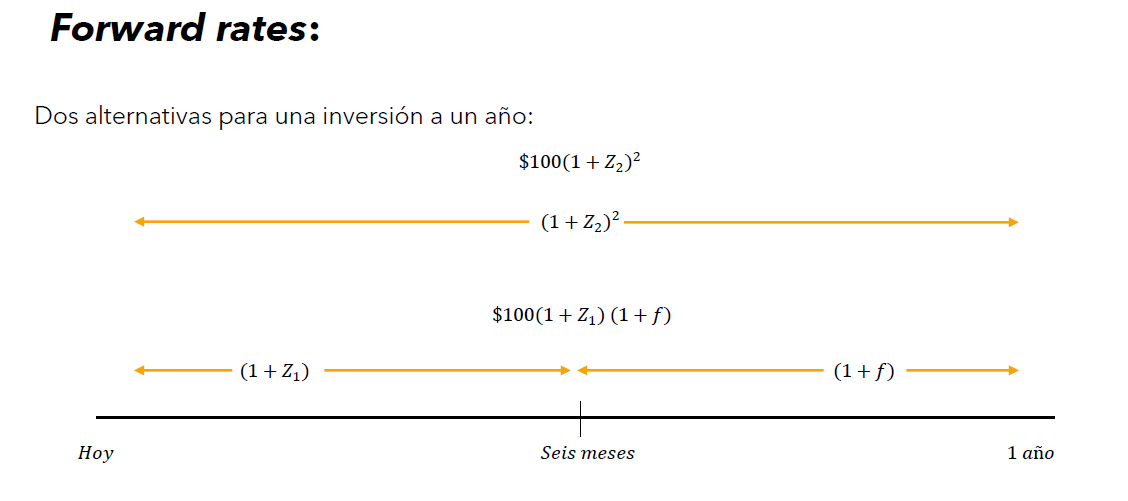

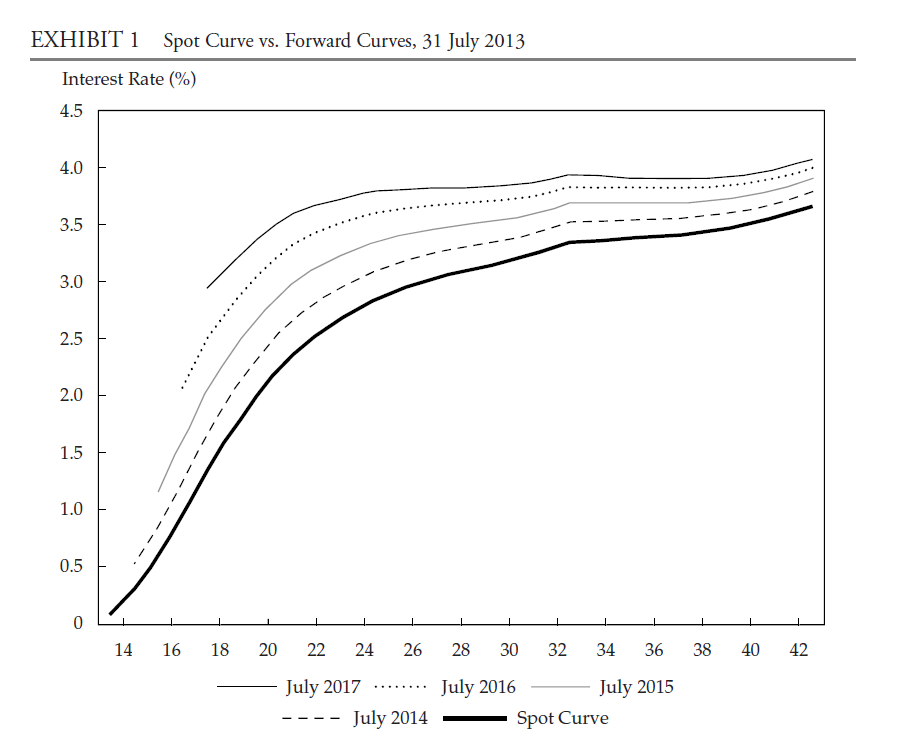


- Carga y visualización histórica: Se cargaron y graficaron los datos históricos de la curva Treasury para distintos plazos, permitiendo observar la evolución de las tasas.

- Construcción de la curva spot: Se extrajo la curva de rendimientos para la fecha más reciente, interpretándola como la curva zero‑coupon.

- Cálculo de la tasa forward: A partir de la curva spot se derivaron las tasas forward promedio para los intervalos entre vencimientos consecutivos utilizando la siguiente fórmula: